# Homework Assignment 2

### <p style="text-align: right;"> &#9989; Elena</p>
### <p style="text-align: right;"> &#9989; eliasel3-hub</p>

## Goals for this homework assignment
By the end of this assignment, you should be able to:
* Define custom classes and show they are implemented correctly through tests.
* Implement agent based models and observe emergent phenomena.
* Use Pandas and NetworkX to create, analyze, and visualize graphs.
* Read documentation to learn about new code.
* Read and understand provided code.

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **88 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due on Friday, October 17th at 11:59pm ET.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2.  Submission instructions can be found at the end of the notebook.

<a id="toc"></a>

## Table of contents

1. [Part 1: Git and CLI](#git) (8 points)

2. [Part 2: Agent based modeling](#abm) (52 points)

3. [Part 3: Graph theory](#graph) (28 points)

---
[Back to ToC](#toc)
<a id="git"></a>
## Part 1: Add to your Git repository to track your progress on your assignment (8 points)

For this assignment, you're going to add it to the `cmse202-f25-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f25-turnin` repository and create a new directory called `hw-02`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f25-turnin`" repository inside the `hw-02` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **1.1 Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# !git clone https://github.com/eliasel3-hub/CMSE202-f25-turnin
```

**You MUST commit and push your notebook multiple times during this assignment.**

---
[Back to ToC](#toc)
<a id="abm"></a>
## Part 2: Build an agent based model for Conway's game of life (52 points)

Conway's game of life is a classic example of a system with simple rules that exhibits interesting emergent phenomena. In this problem you will implement an ABM to simulate Conway's game of life and explore some of this emergent phenomena.

Conway's game of life consists of **cell**s which have a location ($x$ coordinate and $y$ coordinate) and can be alive or dead. Cells interact via the following rules, taken from the [Wikipedia entry](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life#Rules):

1. Any live cell with fewer than two live neighbors dies, as if by underpopulation.
1. Any live cell with two or three live neighbors lives on to the next generation.
1. Any live cell with more than three live neighbors dies, as if by overpopulation.
1. Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction.

&#9989; **Question 2.1 (6 points)**: Complete the following `Cell` class provided the template and docstrings. Some methods are completed for you. You may add data or attributes if convenient, but **you must not remove or change any given attributes or methods from the template**.

In [1]:
class Cell:
    def __init__(self, x, y, alive=False):
        """Initializes a Cell.
  
        Args:
            x (int): The x-coordinate of the cell.
            y (int): The y-coordinate of the cell.
            alive (bool): Whether the cell is alive (True) or dead (False).
        """
        # Do not modify this method!
        self.x = x
        self.y = y
        self.alive = alive

    def is_alive(self):
        """Returns True if the cell is alive, else returns False."""
        return self.alive

    def kill(self):
        """Sets the Cell's alive attribute to False. Does not return a value."""
        self.alive = False

    def live(self):
        """Sets the Cell's alive attribute to True. Does not return a value."""
        self.alive = True

    def copy(self):
        """Returns a copy of the Cell - that is, returns a new Cell with the 
        same x, y, and alive attributes.
        """
        return Cell(self.x, self.y, self.alive)

    def has_same_location(self, other):
        """Returns True if the other Cell has the same location as this Cell, else returns False.

        Args:
            other (Cell): The other Cell to compare locations with.
        """
        return self.x == other.x and self.y == other.y

    def __eq__(self, other):
        """Returns True if the other Cell is equal to this cell, else returns False.

        Two cells are equal if they have they same x, y, and alive attributes.

        Args:
            other (Cell): The other Cell to check equality with.
        """
        if not isinstance(other, Cell):
            return False
        return (self.x == other.x) and (self.y == other.y) and (self.alive == other.alive)

    def __repr__(self):
        """Returns a representation of the cell, useful for printing/displaying 
        in notebooks.
        """
        # Do not modify this method!
        return f"Cell(x={self.x}, y={self.y}, alive={self.alive})"


&#9989; **Question 2.2 (4 points)**: Run the following code cell to show your `Cell` class passes the following tests. Add (at least) one more test for correct behavior and show your test passes using `assert` similar to the provided tests. (Note that the syntax [assert statement](https://realpython.com/python-assert-statement/) raises an error if `statement` is `False`, and otherwise does nothing. This is both an intuitive and powerful way to test code.)

In [13]:
cell = Cell(0, 0, alive=True)
assert cell.x == 0
assert cell.y == 0
assert cell.is_alive()

cell.kill()
assert not cell.is_alive()

cell.live()
assert cell.is_alive()

copy = cell.copy()
assert copy == cell  # checks equality
assert copy is not cell  # ensures it's a different object

other = Cell(0, 0, alive=False)
assert cell.has_same_location(other)  # same x and y
assert cell != other  # but not equal because alive status differs

print("All Cell class tests passed!")


All Cell class tests passed!


&#9989; **Question 2.3 (16 points)**: Complete the following `Board` class provided the template and docstrings. This class consists of a collection of `Cell`s and represents the ABM. Some methods are completed for you. You may add data or attributes if convenient, but **you must not remove or change any given attributes or methods from the template**.

Note: You are strongly encouraged to implement methods from first to last as organized in the class, implementing one method at a time and carefully checking your code. Subsequent questions provide tests which can be used to check correctness.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

class Board:
    def __init__(self, cells):
        """Initializes a Board.

        Args:
            cells (list[Cell]): A list of Cell's.
        """
        # Do not modify this method!
        self.cells = {}
        for cell in cells:
            self.add_cell(cell)

    def add_cell(self, cell):
        """Adds a new Cell to the board. Does not return a value.

        Args:
            cell (Cell): The new cell to add to the board.

        Raises:
            ValueError: If the board already contains a Cell at the provided Cell's location.
        """
        # Do not modify this method!
        if (cell.x, cell.y) in self.cells.keys():
            raise ValueError(
                f"Board already has a cell at the same location of the provided {cell}."
            )
        self.cells[(cell.x, cell.y)] = cell

    def get_cell_at(self, x, y):
        """Returns the Cell located at (x, y) on the Board if there is one, else returns None."""
        return self.cells.get((x, y), None)

    def get_cells(self):
        """Returns a list of all Cell's on the Board."""
        return list(self.cells.values())

    def get_alive_cells(self):
        """Returns a list of Cell's on the Board which are alive."""
        return [cell for cell in self.cells.values() if cell.is_alive()]

    def copy(self):
        """Returns a copy of the Board - that is, a new Board with a copy of all Cell's in the current board."""
        copied_cells = [cell.copy() for cell in self.cells.values()]
        return Board(copied_cells)
    
    def get_neighbors(self, x: int, y: int):
        """Returns the neighboring Cell's at the provided (x, y) location on the Board."""
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip the center cell itself
                neighbor = self.get_cell_at(x + dx, y + dy)
                if neighbor is not None:
                    neighbors.append(neighbor)
        return neighbors

    def get_alive_neighbors(self, x, y):
        """Returns the alive neighboring cells at the (x, y) location on the Board."""
        return [n for n in self.get_neighbors(x, y) if n.is_alive()]

    def run(self):
        """Advances the simulation by one time step, modifying the cells of the board."""
        new_board = self.copy() 
        
        
        positions_to_check = set(self.cells.keys())
        for (x, y) in list(self.cells.keys()):
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    positions_to_check.add((x + dx, y + dy))
        
        for (x, y) in positions_to_check:
            cell = self.get_cell_at(x, y)
            if cell is None:
                cell = Cell(x, y, alive=False)
            
            alive_neighbors = len(self.get_alive_neighbors(x, y))
            new_cell = new_board.get_cell_at(x, y)
            if new_cell is None:
                new_cell = Cell(x, y, alive=False)
                new_board.add_cell(new_cell)
            
           
            if cell.is_alive():
                if alive_neighbors < 2 or alive_neighbors > 3:
                    new_cell.kill()
                else:
                    new_cell.live()
            else:
                if alive_neighbors == 3:
                    new_cell.live()

        self.cells = new_board.cells

    def show(self, alive_color="green", dead_color="white", markersize=500, xlim=None, ylim=None):
        """Plots the state of the board."""
        # Do not modify this method!
        for cell in self.get_cells():
            plt.scatter(
                cell.x,
                cell.y,
                marker="s",
                s=markersize,
                color=alive_color if cell.alive else dead_color,
                edgecolor="black",
                zorder=2,
            )
        plt.legend(
            handles=[
                Patch(facecolor=dead_color, edgecolor="black", label="Dead cell"),
                Patch(facecolor=alive_color, edgecolor="black", label="Alive cell")
            ],
            bbox_to_anchor=(1.25, 1)
        )
        plt.grid()
        if xlim:
            plt.xlim(xlim)
            plt.xticks(range(xlim[0], xlim[1] + 1, 1))
        if ylim:
            plt.ylim(ylim)
            plt.yticks(range(ylim[0], ylim[1] + 1, 1))


&#9989; **Question 2.4 (2 points)**: The first test of your `Board` class is to initialize and show a board. Create a simple `Board` with an alive cell at (0, 0), a dead cell at (0, 1), and an alive cell at (1, 1). Use the `show` method to show that your board is correct.

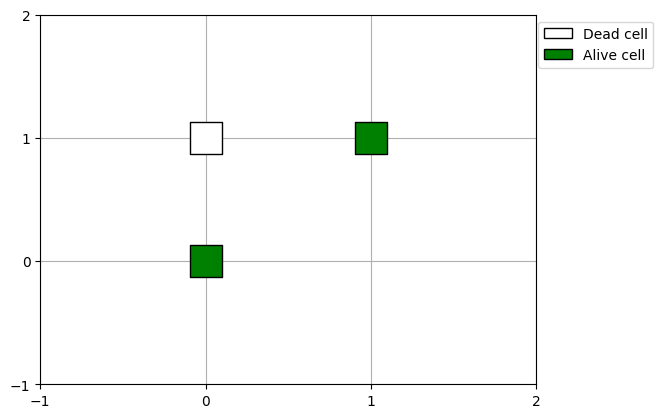

In [14]:

cells = [
    Cell(0, 0, alive=True),
    Cell(0, 1, alive=False),
    Cell(1, 1, alive=True)
]


board = Board(cells)


board.show(xlim=(-1, 2), ylim=(-1, 2))
plt.show()


&#9989; **Question 2.5 (6 points)**: Using the provided random state (**Don't change this!**):

1. Create a `Board` with `Cell`s at locations (x, y) for all $x$ in the range 0 to 10 and for all $y$ in the range 0 to 10. (This means there should be 100 total `Cell`s.) At all $x$, $y$ coordinates, cells should be alive or dead according to `Cell(x, y, alive=rng.randint(0, 2))`, using the provided random state `rng`.
2. Run the simulation for 32 iterations and show the board after each iteration, putting the title "Timestep t" (where t is the current timestep) on the plot. Note that code is provided for you to clear and update the figure from one timestep to the next.
3. There should be four alive cells remaining at the end of the simulation. Will these cells stay alive forever? Why or why not?

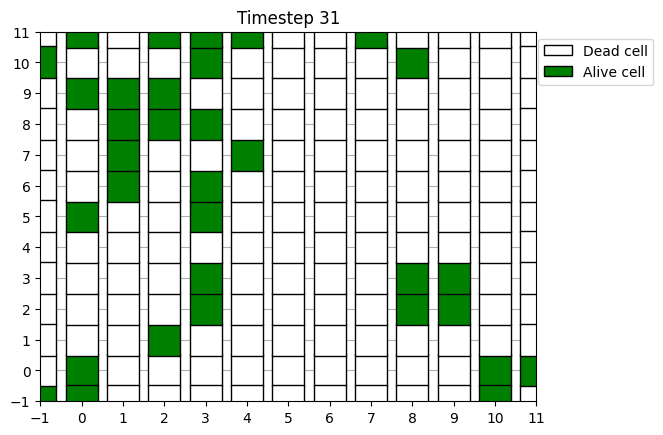

In [ ]:
import time
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)


cells = [Cell(x, y, alive=rng.randint(0, 2)) for x in range(11) for y in range(11)]
board = Board(cells)

fig, ax = plt.subplots()
for t in range(33): 
    plt.title(f"Timestep {t}")
    board.show(xlim=(-1, 11), ylim=(-1, 11))
    
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
    if t < 32:
        board.run() 


**<font size=+3>&#9998;</font> 
After 32 iterations, four alive cells remain.
These cells may not stay alive forever; it depends on the configuration of neighbors.
In Conway's Game of Life, some patterns are stable (still lifes), but others may die or oscillate.**

&#9989; **Question 2.6 (4 points)**: There are several configurations which persist indefinitely in Conway's game of life. One of them is a "blinker". Create a three by three array of cells with only the middle row alive. Advance the simulation ten time steps and show that the pattern repeats every two time steps.

In [ ]:

cells = [
    Cell(0, 0, alive=False), Cell(0, 1, alive=False), Cell(0, 2, alive=False),
    Cell(1, 0, alive=True),  Cell(1, 1, alive=True),  Cell(1, 2, alive=True),
    Cell(2, 0, alive=False), Cell(2, 1, alive=False), Cell(2, 2, alive=False)
]

board = Board(cells)

fig, ax = plt.subplots()
for t in range(10):
    plt.title(f"Timestep {t}")
    board.show(xlim=(-1, 3), ylim=(-1, 3))
    
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
    board.run()  


&#9989; **Question 2.7 (4 points)**: Other configurations travel across the board. One of these is a "glider". Create a square ten by ten array of cells with coordinates (0, 0), (0, 1), ..., (0, 9), (1, 0), (1, 1), ..., (1, 0), ..., (9, 0), (9, 1), ..., (9, 9). All cells should be dead except those with coordinates (0, 7), (1, 7), (2, 7), (2, 8), and (1, 9). Run the simulation and show that your glider advances from the top left to the lower right, retaining the same configuration. How many timesteps does it take for the glider to reach the lower right with the same shape as the initial glider? Set the total number of timesteps to this number.

In [ ]:

cells = [Cell(x, y, alive=False) for x in range(10) for y in range(10)]


glider_coords = [(0, 7), (1, 7), (2, 7), (2, 8), (1, 9)]
for x, y in glider_coords:

    for cell in cells:
        if cell.x == x and cell.y == y:
            cell.live()
            break

board = Board(cells)

total_timesteps = 16  

fig, ax = plt.subplots()
for t in range(total_timesteps + 1):
    plt.title(f"Timestep {t}")
    board.show(xlim=(-1, 10), ylim=(-1, 10))
    
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
    if t < total_timesteps:
        board.run() 


&#9989; **Question 2.8 (6 points)**: If your simulation exhibits the correct behavior for the previous two questions, it's likely (though not guarunteed) that your implementation is correct. Now, we can study behavior for random initial configurations.

Given the following random state, board dimensions (`xdim` and `ydim`), and total number of time steps, do the following.

For each initial probability of a cell being alive $p$ in the given list:

1. Create the board where each cell is alive with probability $p$.

Then, for each time step:

2. Record the fraction of cells alive.
3. Advance the simulation.

Make a plot of fraction of cells alive (vertical axis) vs time step (horizontal axis), with one curve for each probability $p$.

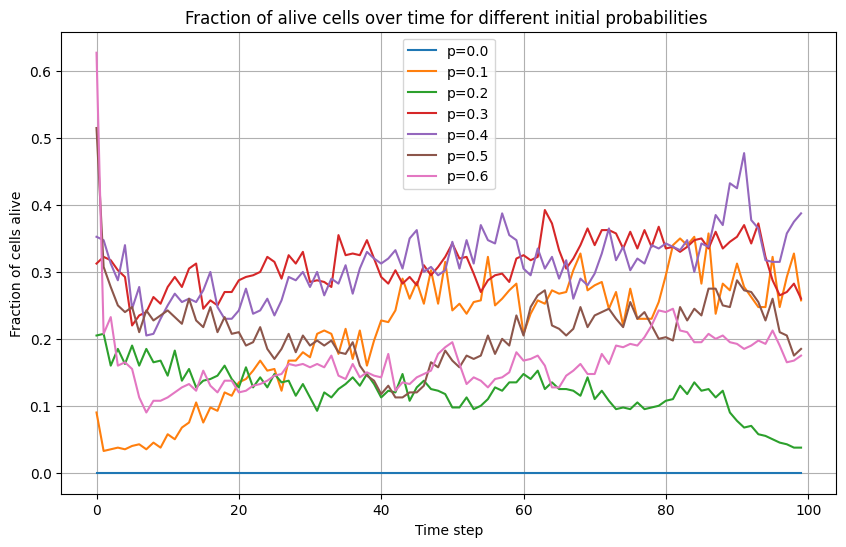

In [19]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)

xdim = 20
ydim = 20
time_steps = 100
alive_probabilities = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

plt.figure(figsize=(10, 6))

for p in alive_probabilities:
 
    cells = [Cell(x, y, alive=(rng.rand() < p)) for x in range(xdim) for y in range(ydim)]
    board = Board(cells)
    
    fractions_alive = []

    for t in range(time_steps):
        alive_count = len(board.get_alive_cells())
        total_cells = xdim * ydim
        fractions_alive.append(alive_count / total_cells)
        
        board.run()

    plt.plot(range(time_steps), fractions_alive, label=f"p={p}")

plt.xlabel("Time step")
plt.ylabel("Fraction of cells alive")
plt.title("Fraction of alive cells over time for different initial probabilities ")
plt.legend()
plt.grid(True)
plt.show()


&#9989; **Question 2.9 (4 points)**: Interpret your results from the previous question:

1. What values of $p$ have the highest fraction of alive cells throughout the simulation? Does this make sense based on the rules of Conway's game of life?
2. Do all curves tend to zero? Why or why not?

**<font size=+3>&#9998;</font> From the simulation results, we observe that intermediate probabilities, around p = 0.3 to 0.4, tend to maintain the highest fraction of alive cells throughout the simulation. Very low probabilities, such as p = 0.0 or 0.1, result in too few cells to sustain life, causing many to die from underpopulation. Conversely, very high probabilities, like p = 0.5 or 0.6, lead to overcrowding, which causes many cells to die from overpopulation. This behavior aligns with the rules of Conway’s Game of Life, which favor a balance: cells require some neighbors to survive but too many neighbors result in death. Not all curves tend to zero; for intermediate probabilities, the fraction of alive cells often stabilizes at a nonzero value due to the formation of stable patterns (still lifes)  and oscillators. In contrast, boards with very low or very high initial probabilities may quickly drop to zero because of underpopulation or overpopulation. Thus, whether the fraction of alive cells goes to zero depends on the initial density and the emergence of stable configurations during the simulation.**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
[Back to ToC](#toc)
<a id="graph"></a>
## Part 3: Graph theory with transportation data (28 points)

In this part of the homework, we will look at a dataset which contains the whole UK public transport system for a week in October 2010 [[1](https://doi.org/10.1038/srep38994), [2](https://doi.org/10.1038/sdata.2014.56), [data file](https://datadryad.org/stash/dataset/doi:10.5061/dryad.pc8m3)]. We will model this data as a graph where each team is terminal where travel starts/stops is a node. We will later add directionarlity to capture the departure arrival relationship, and weights on edges that represent travel time. 

&#9989;  **Question 3.1 (3 points)**: Go to [this website](https://datadryad.org/stash/dataset/doi:10.5061/dryad.pc8m3) and download the full data set. Unpack the .zip file into your working directory. The data we need is in the folder Data_Release_v1.11. After you unzip the folder, you will see edges.csv and nodes.csv, plus some other files. The former two are the ones we will primarily work with here. 

**Do This:** Load the nodes.csv and edges.csv in this file into `Pandas` `DataFrames`. Display the first few and last few rows of each. 

In [20]:
# Your code here.
import pandas as pd

# Load the CSV files
nodes = pd.read_csv("nodes.csv")
edges = pd.read_csv("edges.csv")

# Display first few and last few rows of nodes
print("Nodes DataFrame:")
print(nodes.head())
print(nodes.tail())

# Display first few and last few rows of edges
print("\nEdges DataFrame:")
print(edges.head())
print(edges.tail())


Nodes DataFrame:
   node  layer       lat      lon   zone      atcocode
0     0      5  51.40078 -0.46353  400.0  400G4402814B
1     1      2  51.85401  0.99745  150.0   910GALRESFD
2     1      5  51.85401  0.99745  150.0   910GALRESFD
3     1      4  51.85401  0.99745  150.0   910GALRESFD
4     2      5  52.40505 -0.33145   50.0  050GHE001002
          node  layer       lat      lon   zone      atcocode
205151  200792      5  54.06076 -2.81151  250.0   2500DCL4103
205152  200793      5  53.92664 -2.97672  250.0   2500DCL4100
205153  200794      5  55.94012 -3.29062  620.0    6200200970
205154  200795      5  52.45318 -1.47580  430.0   43000026901
205155  200796      5       NaN      NaN    NaN           NaN

Edges DataFrame:
   ori_node  des_node  ori_layer  des_layer  minutes       km
0       325     31793          1          1        7    0.707
1       338     36564          1          1        7    0.920
2       348     46689          1          1        5    0.439
3       601    

Now, you will construct a graph of the nodes (stops). 

&#9989;  **Question 3.2 (5 points)**: Create an empty (undirected, unweighted)`Graph` object from the `networkx` package. For each row of the `DataFrame` where both the destination and origin are associated to "Rail," i.e., the integer 2 in both ori_layer and des_layer of edges.csv, add an edge between the origin (ori_node) and the destination (des_node) nodes.  

In [21]:

import networkx as nx

# Create an empty undirected, unweighted graph
G = nx.Graph()

# Filter edges where both origin and destination are "Rail" (layer 2)
rail_edges = edges[(edges['ori_layer'] == 2) & (edges['des_layer'] == 2)]

# Add edges to the graph
for _, row in rail_edges.iterrows():
    G.add_edge(row['ori_node'], row['des_node'])

# Optional: print some info about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# Your code here.

Number of nodes: 2490
Number of edges: 4387


Plotting the graph. 

&#9989;  **Question 3.3 (5 points)**: Plot the graph using the latitude and longitude of each node as its position, labeled by the columns lat and lon, respectively in nodes.csv.

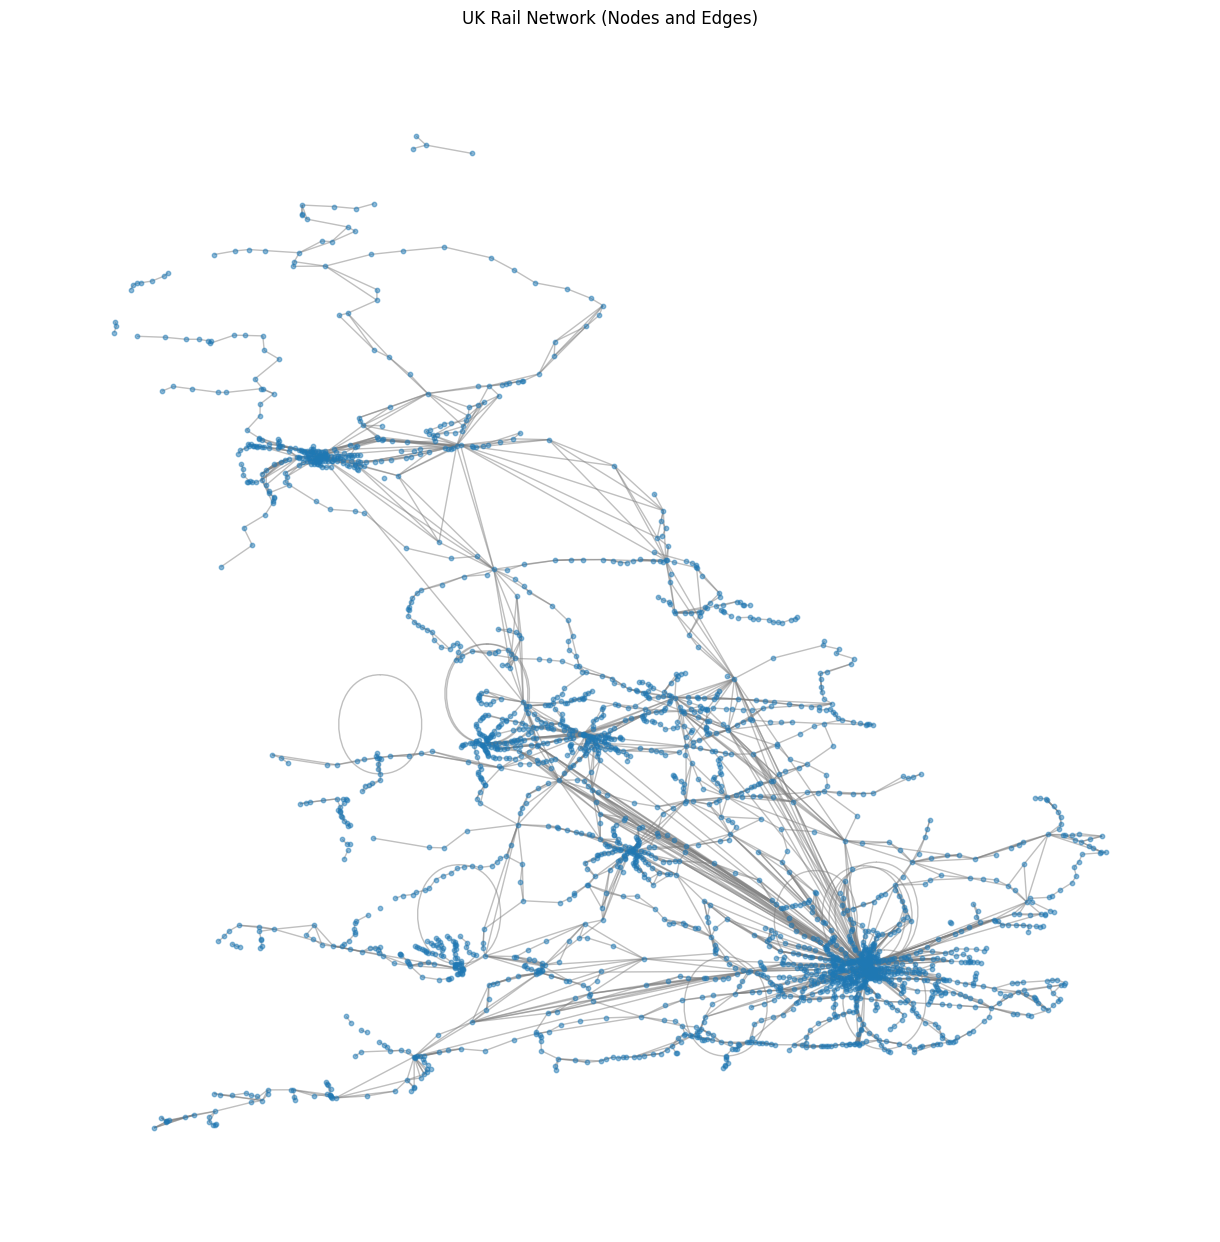

In [26]:
nodes['node'] = nodes['node'].astype(int)
edges['ori_node'] = edges['ori_node'].astype(int)
edges['des_node'] = edges['des_node'].astype(int)

# --- Create graph ---
G = nx.Graph()
rail_edges = edges[(edges['ori_layer'] == 2) & (edges['des_layer'] == 2)]
for _, row in rail_edges.iterrows():
    G.add_edge(row['ori_node'], row['des_node'])

# --- Create positions dictionary ---
pos = {row['node']: (row['lon'], row['lat']) for _, row in nodes.iterrows()}

# Keep only nodes that have positions
G = G.subgraph(pos.keys())

# --- Plot the graph ---
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    pos=pos,
    node_size=10,       # small nodes
    edge_color='gray',
    alpha=0.5
)
plt.title("UK Rail Network (Nodes and Edges)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Next, you will construct the weighted directed graph to represent this data. 

&#9989;  **Question 3.4 (5 points)**: Create an empty `DiGraph` object from the `networkx` package. For each row of the `DataFrame`where both the destination and origin are associated to "Rail," i.e., the integer 2 in both ori_layer and des_layer of edges.csv, add a directed edge from the node corresponding to the origin node (ori_node) to the destination_node (des_node). 

For directed graphs, the parameter *weight* can be used to specify the weight of each edge. Use the kilometers distance (`km` in edges.csv) between the origin and destination nodes as the weight for each edge.

Note: Remember that each edge in a directed graph has an orientation. So adding an edge from node A to node B is not the same thing as adding an edge from node B to node A. 

In [ ]:
# Your code here.

&#9989;  **Question 3.5 (5 points)**: Plot the directed graph using the spring_layout option, __not the spatial coordinates you used in 3.4.__, for nodes' positions.

In [ ]:
# Your code here.

&#9989;  **Question 3.6 (5 points)**: When making travel plans for individuals and freight, it is often helpful to find the shortest path from origin to destination stations. Write code that identifies the shortest path between two points and then prints out the ID for each of the nodes along the path.

Specifically, make a function that takes in the directed graph that you created along with two nodes representing the origin and destination stations, and then prints a sequence of statements of the form "Take [origin_nodeID] to [destination_nodeID]" which can be used to make travel plans along the shortest path from the origin to the destination`. For multiple transitions, the code must print out the sequence of statements "Take [origin_nodeID]{i} to [destination_nodeID]{i+1}".

Make sure to include an error in case a path does not exist between the requested source and origin. See the documentation on [Exceptions](https://networkx.org/documentation/stable/reference/exceptions.html) in networkx to find an appropriate exception to raise.

In [ ]:
# Fill out the following function.
def find_itinerary(digraph, origin_nodeID, destination_nodeID):
    pass

In [ ]:
# Use this command to test your code.
find_itinerary(DG, origin_nodeID=1, destination_nodeID=169164)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 3", and push the changes to GitHub.

---

[Back to ToC](#toc)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #2, and upload **your notebook** there.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University